In [2]:
import pathlib
import matplotlib as mpl
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import NullLocator

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0.2,
    "transparent": True,
}

mpl.rc("savefig", dpi=300)
output_dir = "/home/michaelswift/repos/tabula-bursa/analysis/figures/ED/in_vitro"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
sc._settings.figdir = output_dir
output_suffix = ""
output_formats = [".png",".pdf"]
def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)

plt.style.use('../bursa.mplstyle')
sns.set_style("ticks")

In [3]:
%run ../helper.py

# 

In [4]:
adata = sc.read_h5ad("/home/michaelswift/repos/seqclone3/analysis/processed_data/h5ad_objects/bcells.h5ad")
adata.obs_names_make_unique(join="_")

In [5]:
ad_in_vivo = adata[adata.obs.sample_id == 'BM CD138+']

In [6]:
ad_in_vivo.obs.IR_VDJ_1_c_call.value_counts(normalize=True)

IR_VDJ_1_c_call
IGHA1    0.490715
IGHG1    0.170544
IGHG2    0.147065
IGHD     0.108431
IGHA2    0.074493
IGHM     0.008538
IGHE     0.000213
Name: proportion, dtype: float64

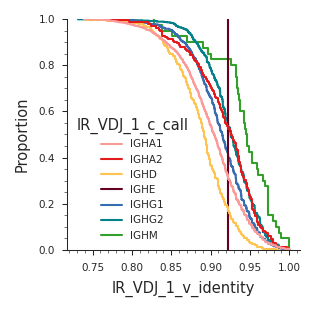

In [8]:
sns.ecdfplot(ad_in_vivo.obs, x = "IR_VDJ_1_v_identity", hue="IR_VDJ_1_c_call", complementary=True, palette = IGH_colors)
sns.despine()